In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
df = pd.read_csv('jamboree.csv')
df1 = df.copy()

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
print("Shape of data is: ", df.shape)
print('-----------------------------------------')
print()
df.info()

Shape of data is:  (500, 8)
-----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.columns = df.columns.str.strip()
cols = [col for col in df.columns]
skip_cols = ["Research","LOR","SOP"]

In [ ]:
cols

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance of Admit']

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

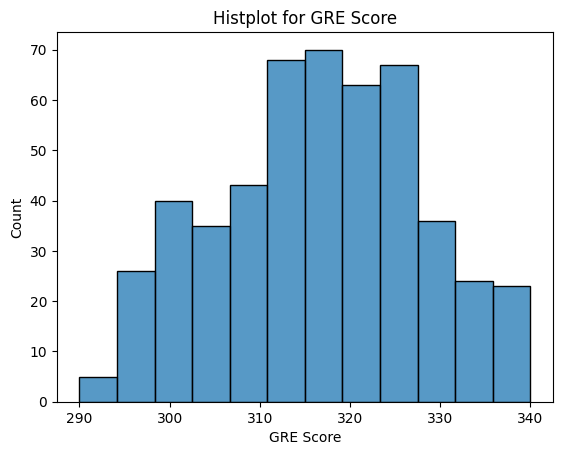

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

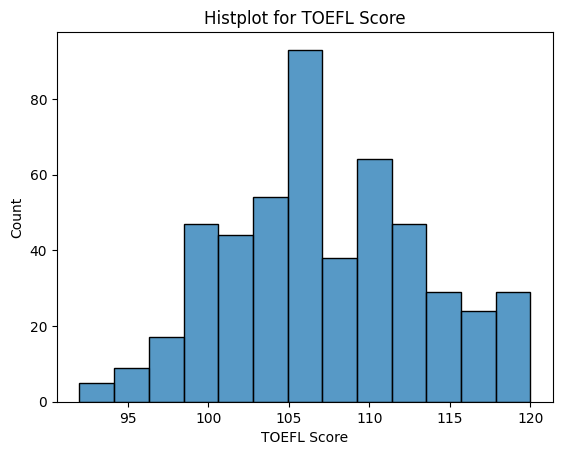

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

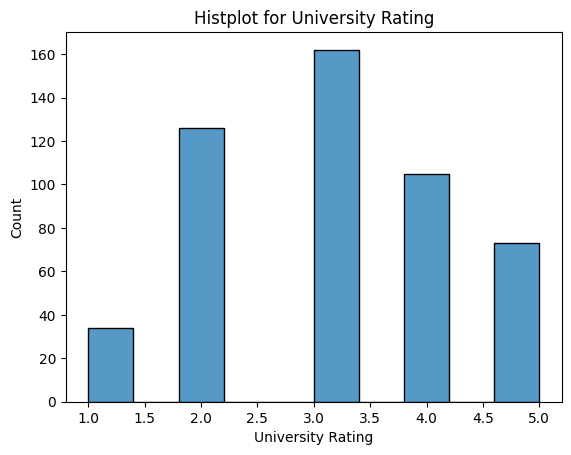

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

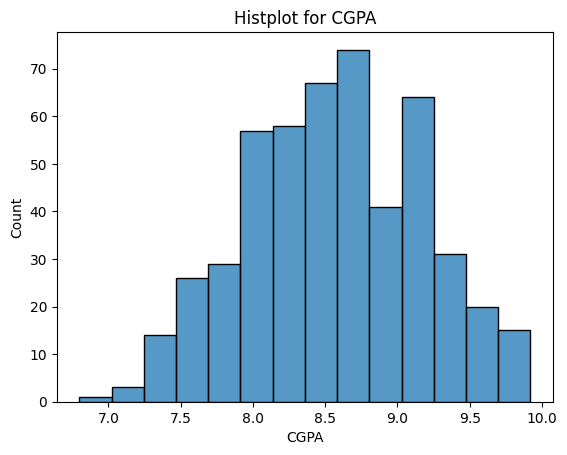

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

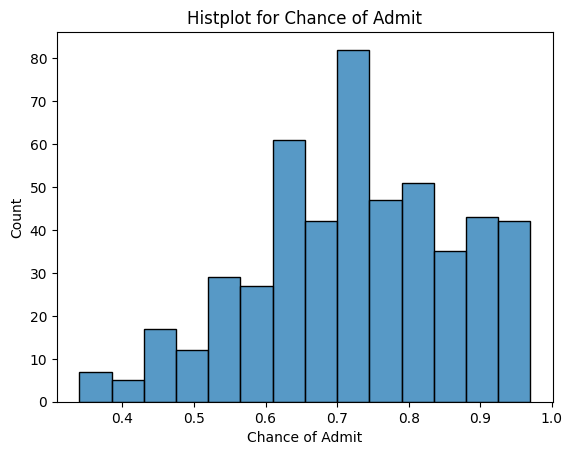

In [ ]:
def visualize_countplot(dataframe):
  for i in cols:
    if i in skip_cols:
      continue
    else:
      plt.figure(figsize=(6,4))
      fig = plt.figure()
      fig.tight_layout(pad=5.0)
      plt.figure()
      sns.histplot(data=dataframe, x = i,bins='auto')
      plt.title(f"Histplot for {i}")
      plt.show()
visualize_countplot(df)

# INFERENCES FROM PLOTS
- A huge number of graduates score between 310 - 330 in GRE.
- The median of graduate score in TOEFL is around 107.
- Many universities rank b/w 2.0 - 3.5.
- Majority of the students have their cgpa between 8.0 - 9.3.
- Half of the total number of students stand a 60-80% chance to get into IVY League College.

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

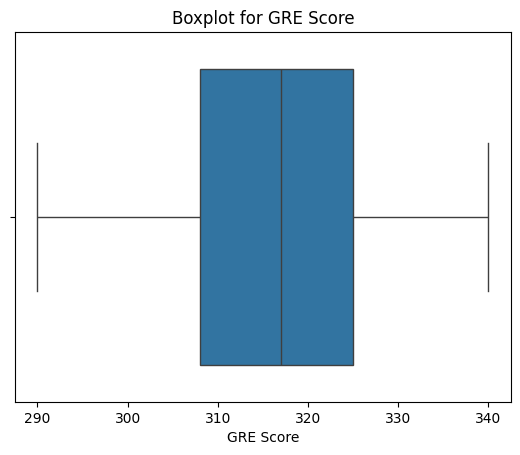

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

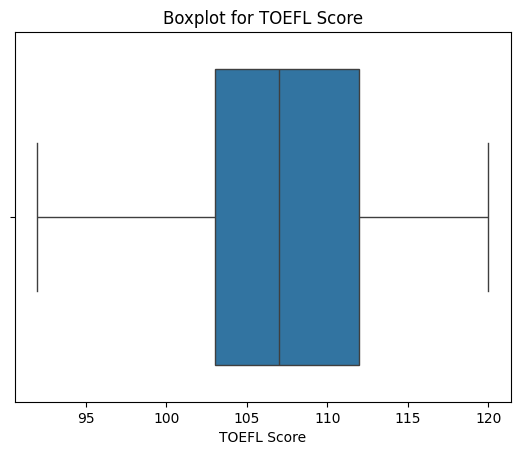

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

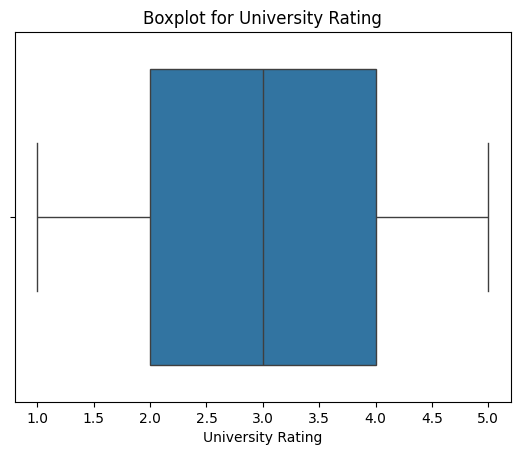

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

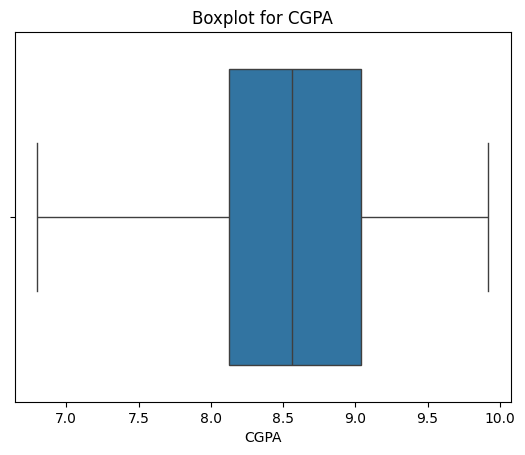

<Figure size 600x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

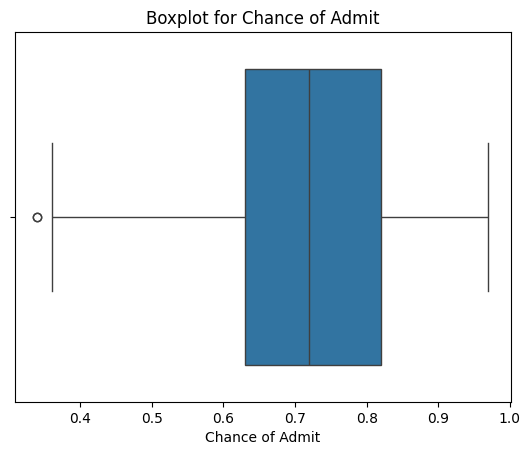

In [ ]:
def visualize_boxplot(dataframe):
  for i in cols:
    if i in skip_cols:
      continue
    else:
      plt.figure(figsize=(6,4))
      fig = plt.figure()
      fig.tight_layout(pad=5.0)
      plt.figure()
      sns.boxplot(data=dataframe, x = i)
      plt.title(f"Boxplot for {i}")
      plt.show()
visualize_boxplot(df)

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

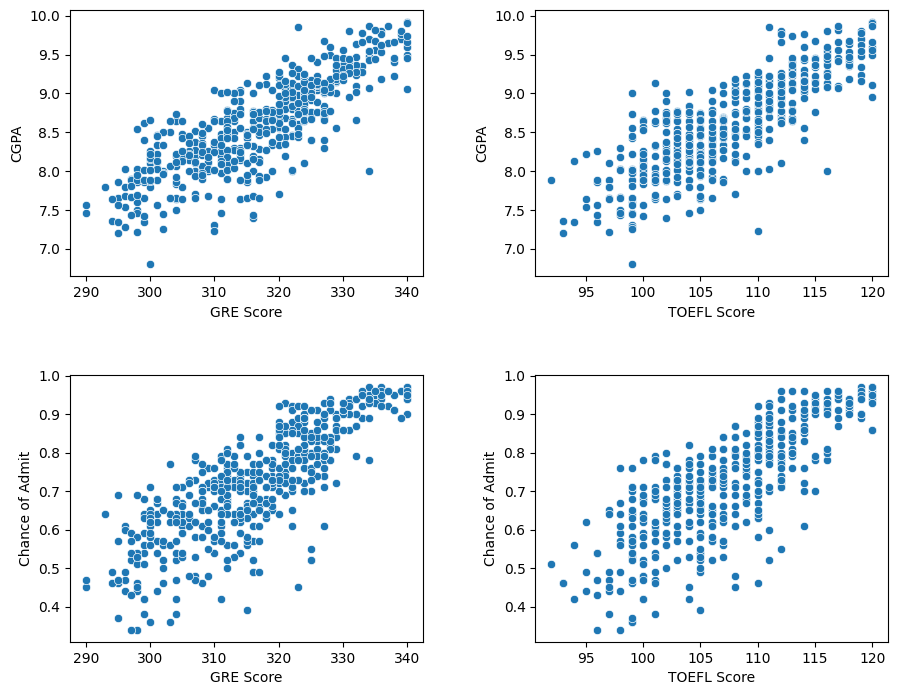

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=5.0)

sns.scatterplot(data=df,x='GRE Score',y='CGPA',ax=axes[0,0])

sns.scatterplot(data=df,x='TOEFL Score',y='CGPA',ax=axes[0,1])

sns.scatterplot(data=df,x='GRE Score',y='Chance of Admit',ax=axes[1,0])

sns.scatterplot(data=df,x='TOEFL Score',y='Chance of Admit',ax=axes[1,1])

In [ ]:
# Creating Feature and Target dataset
X = df.drop(columns = ['Chance of Admit'])
y = df['Chance of Admit']

In [ ]:
# Doing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [ ]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
LRmodel = LinearRegression()

In [ ]:
LRmodel.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_train_pred = LRmodel.predict(X_train_scaled)
y_pred = LRmodel.predict(X_test_scaled)

In [ ]:
coefficients = LRmodel.coef_
coef_df = pd.DataFrame({'Features':X_train.columns, 'Coefficients':coefficients})
coef_df['Intercept'] = LRmodel.intercept_
coef_df

,Features,Coefficients,Intercept
0,GRE Score,0.022258,0.722587
1,TOEFL Score,0.021174,0.722587
2,University Rating,0.006833,0.722587
3,SOP,0.002327,0.722587
4,LOR,0.014904,0.722587
5,CGPA,0.067200,0.722587
6,Research,0.009111,0.722587


In [ ]:
def check_model_performance(ytest,ypred,model):
  n = len(ytest)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else :
    p = len(model.coef_[0])
  mse = np.round(mean_squared_error(y_true=ytest,y_pred=ypred),2)
  mae = np.round(mean_absolute_error(y_true=ytest,y_pred=ypred),2)
  r2score = np.round(r2_score(y_true=ytest, y_pred=ypred),2)
  adj_r = np.round(((1-r2score)*(n-1))/(n-p-1),2)
  return print(f"MSE: {mse}\nMAE: {mae}\nr2 score: {r2score}\nadjusted r: {adj_r}")

In [ ]:
print("TRAINING MODEL")
check_model_performance(y_train_pred, y_train, LRmodel)
print('-'*30)
print("TESTING MODEL")
check_model_performance(y_pred, y_test, LRmodel)

TRAINING MODEL
MSE: 0.0
MAE: 0.04
r2 score: 0.78
adjusted r: 0.22
------------------------------
TESTING MODEL
MSE: 0.0
MAE: 0.04
r2 score: 0.76
adjusted r: 0.25


As there is no difference between the results of the training and testing model, conlusion can be drawn that there is no overfitting.

In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=0.10)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_y_pred = ridge_model.predict(X_test_scaled)

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_train_pred = lasso_model.predict(X_train_scaled)
lasso_y_pred = lasso_model.predict(X_test_scaled)

# Ordinary Least Squares

In [ ]:
# Checking which features have a high impact on the target variable.

# constant term represents the expected value of the dependent variable when
# all the independent variables are zero.
new_X_train = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, new_X_train)
result = ols_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     239.8
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.03e-132
Time:                        06:59:53   Log-Likelihood:                 527.06
No. Observations:                 375   AIC:                            -1038.
Df Residuals:                     367   BIC:                            -1007.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3151      0.11

From the above results it is clear that GRE Score, TOEFL Score, LOR, CGPA, and Research significantly impact the target variable whereas University Ranking and SOP don't.

# Variance Inflation Factor (VIF)

In [ ]:
# Using Variance Inflation Factor to check if any feature can be dropped.
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif = vif.sort_values(by="VIF",ascending = False)

In [ ]:
vif

,Feature,VIF
5,CGPA,4.780632
0,GRE Score,4.496416
1,TOEFL Score,3.993498
3,SOP,2.670858
2,University Rating,2.638986
4,LOR,2.080955
6,Research,1.514193


Not a single feature has a VIF > 5 which suggestes there is no multi-collinearity between any 2 features.

# Mean of Residuals

In [ ]:
residuals = y_test - y_pred

In [ ]:
print(residuals)
print('-'*55)
print(residuals.mean())

167   -0.000520
169    0.060745
461    0.074836
253   -0.009291
42    -0.151141
         ...   
376   -0.134571
475    0.025958
401    0.000877
476    0.021443
411   -0.008133
Name: Chance of Admit, Length: 125, dtype: float64
-------------------------------------------------------
0.0013279422273378917


<Axes: xlabel='Chance of Admit', ylabel='Count'>

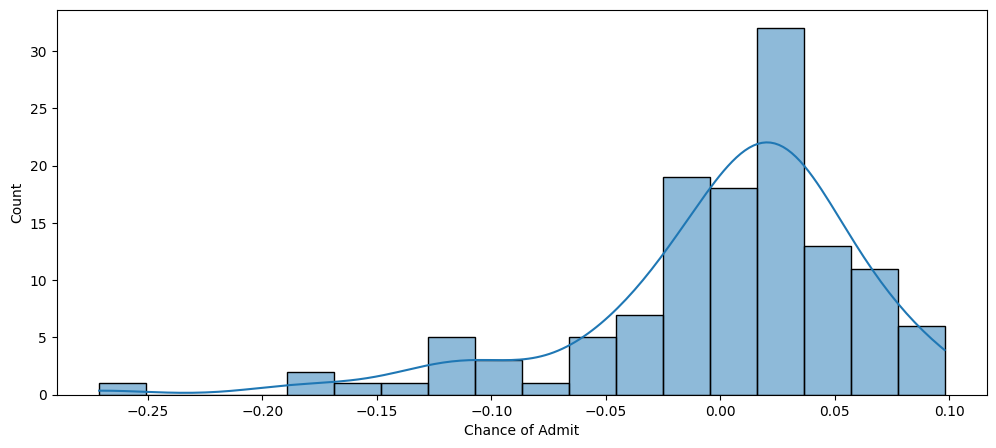

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(residuals, kde=True)

<Figure size 1500x500 with 0 Axes>

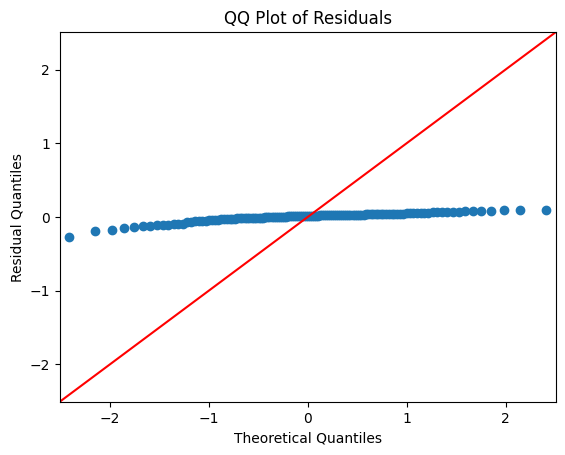

In [ ]:
plt.figure(figsize=(15,5))
sm.qqplot(residuals,line='45')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

The QQ plot shows that the distribution of residuals is not Gaussian.

In [ ]:
X = df.iloc[:,:-1]
X_new = sm.add_constant(X)
y = df['Chance of Admit']
ols_model = sm.OLS(y,X_new).fit()
residualss = ols_model.resid
lm_stat, p_val, fstat, fval = het_breuschpagan(residualss, X_new)
print(f"Lagrange's Multiplier is {lm_stat}\np_value is {p_val}\nf_statistic is {fstat}\nf_value is {fval}")

Lagrange's Multiplier is 30.516108574528023
p_value is 7.633732994409787e-05
f_statistic is 4.568519873746504
f_value is 5.859302028991043e-05


In [ ]:
if p_val< 0.05:
    print("Heteroscedasticity detected (reject null hypothesis).")
else:
    print("No heteroscedasticity detected (fail to reject null hypothesis).")

Heteroscedasticity detected (reject null hypothesis).


In [ ]:
print('Linear Regression Training Accuracy\n')
check_model_performance(y_train.values, y_train_pred, LRmodel)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
check_model_performance(y_pred, y_test, LRmodel)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
check_model_performance(y_train.values, ridge_train_pred, ridge_model)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
check_model_performance(y_test.values, ridge_y_pred, ridge_model)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
check_model_performance(y_train.values, lasso_train_pred, lasso_model)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
check_model_performance(y_test.values, lasso_y_pred, lasso_model)
print('*'*25)

Linear Regression Training Accuracy

MSE: 0.0
MAE: 0.04
r2 score: 0.82
adjusted r: 0.18
*************************

Linear Regression Test Accuracy

MSE: 0.0
MAE: 0.04
r2 score: 0.76
adjusted r: 0.25
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE: 0.0
MAE: 0.04
r2 score: 0.82
adjusted r: 0.18
*************************


Ridge Regression Test Accuracy

MSE: 0.0
MAE: 0.04
r2 score: 0.82
adjusted r: 0.19
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE: 0.01
MAE: 0.1
r2 score: 0.27
adjusted r: 0.74
*************************


Lasso Regression Test Accuracy

MSE: 0.02
MAE: 0.1
r2 score: 0.25
adjusted r: 0.79
*************************


Train and Test on Linear regression model and Ridge regression give similar results with r2 score around 0.80 which suggests that the model, if given an unseen sample will predict correctly but Lasso regression does not perform well.